In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import keras

import warnings

In [2]:
df = pd.read_csv(r"C:\Users\admin\Desktop\bootcamp\hw11-3\final_dataa.csv")
print(df.head(7))

   Unnamed: 0                             address  \
0           2  Address: 1160 Mission Street #2007   
1           5       Address: 260 King Street #475   
2           7     Address: 560 Missouri Street #B   
3           9        Address: 350 Missouri Street   
4          11         Address: 3658 Folsom Street   
5          12          Address: 156 Lowell Street   
6          13        Address: 735 Lakeview Avenue   

                                                info  \
0   San FranciscoSales price: 1300000Sales date: ...   
1   San FranciscoSales price: 750000Sales date: 0...   
2   San FranciscoSales price: 1495000Sales date: ...   
3   San FranciscoSales price: 2700000Sales date: ...   
4   San FranciscoSales price: 1530000Sales date: ...   
5   San FranciscoSales price: 460000Sales date: 0...   
6   San FranciscoSales price: 532000Sales date: 0...   

                   z_address  bathrooms  bedrooms  finishedsqft lastsolddate  \
0  1160 Mission St UNIT 2007        2.0       

In [3]:
df.drop(df.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
# deleting unnecessary columns which are "unnamed column", info,zaddress,zipcode, zipid, zestimate (an estime price for the houses from zillow.com)


df['zindexvalue'] = df['zindexvalue'].str.replace(',', '')
df["zindexvalue"]=df["zindexvalue"].astype(np.int64) 
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11330 non-null  object 
 1   bathrooms      11330 non-null  float64
 2   bedrooms       11330 non-null  int64  
 3   finishedsqft   11330 non-null  int64  
 4   lastsolddate   11330 non-null  object 
 5   lastsoldprice  11330 non-null  int64  
 6   latitude       11330 non-null  float64
 7   longitude      11330 non-null  float64
 8   neighborhood   11330 non-null  object 
 9   totalrooms     11330 non-null  int64  
 10  usecode        11330 non-null  object 
 11  yearbuilt      11330 non-null  int64  
 12  zindexvalue    11330 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 1.1+ MB


In [4]:
df['price_per_sqft'] = df['lastsoldprice']/df['finishedsqft']


freq = df.groupby('neighborhood').size()

mean = df.groupby('neighborhood').mean()['price_per_sqft']

cluster = pd.concat([freq, mean], axis=1)
cluster['neighborhood'] = cluster.index
cluster.columns = ['freq', 'price_per_sqft','neighborhood']
# print(cluster.describe())
#minik bir veri kümesi oluşturduk. Hangi neighborhoodda kaç ev olduğunu ve bunların price per sqft(square footage) fiyatlarını bulduk



In [5]:
cluster1 = cluster[cluster.price_per_sqft < 756]
# print("\n",len(cluster1.index)," neighborhoods are low price which are", cluster1.index)

cluster_temp = cluster[cluster.price_per_sqft >= 756]
cluster2 = cluster_temp[cluster_temp.freq <123]
# print("\n", len(cluster2.index), "neighborhoods are high price but has low frequency which are ", cluster2.index)

cluster3 = cluster_temp[cluster_temp.freq >=123]
# print("\n", len(cluster3.index), "neighborhoods are high price and has high frequency which are ", cluster3.index)

In [6]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
df['group'] = df.neighborhood.apply(get_group)
# # I categorized the new feature cluster into 3.

n = pd.get_dummies(df.group)
df = pd.concat([df, n], axis=1)
m = pd.get_dummies(df.usecode)
df = pd.concat([df, m], axis=1)
drops = ['group', 'usecode']
df.drop(drops, inplace=True, axis=1)

In [7]:
def is_new(row):
    if row["yearbuilt"] > 2005:
        return 1
    else:
        return 0

df["is_new"] = df.apply(is_new, axis=1)

In [8]:
X = df[["bathrooms","bedrooms","zindexvalue","finishedsqft","yearbuilt","price_per_sqft","is_new","high_price_low_freq","Duplex","MultiFamily2To4"]]
y = df["lastsoldprice"]



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)

(7931, 10)


In [10]:
girdi_adedi = X_train.shape[1] 

model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(girdi_adedi,), name = "Gizli_Katman_1"))
model.add(Dense(50, activation='relu', name = "Gizli_Katman_2"))
model.add(Dense(1, name = "Cikti"))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.fit(X_train, y_train, epochs=20, verbose=0)

In [11]:
mae_egitim = model.evaluate(X_train, y_train)[1]
mae_test = model.evaluate(X_test, y_test)[1]

print("\nEğitim kümesi MAE değeri : {:.3f}".format(mae_egitim))
print("Test kümesi MAE değeri   : {:.3f}".format(mae_test))

107/107 [==============================] - 0s 485us/step - loss: 641690501120.0000 - mae: 506008.6562

Eğitim kümesi MAE değeri : 526839.312
Test kümesi MAE değeri   : 506008.656


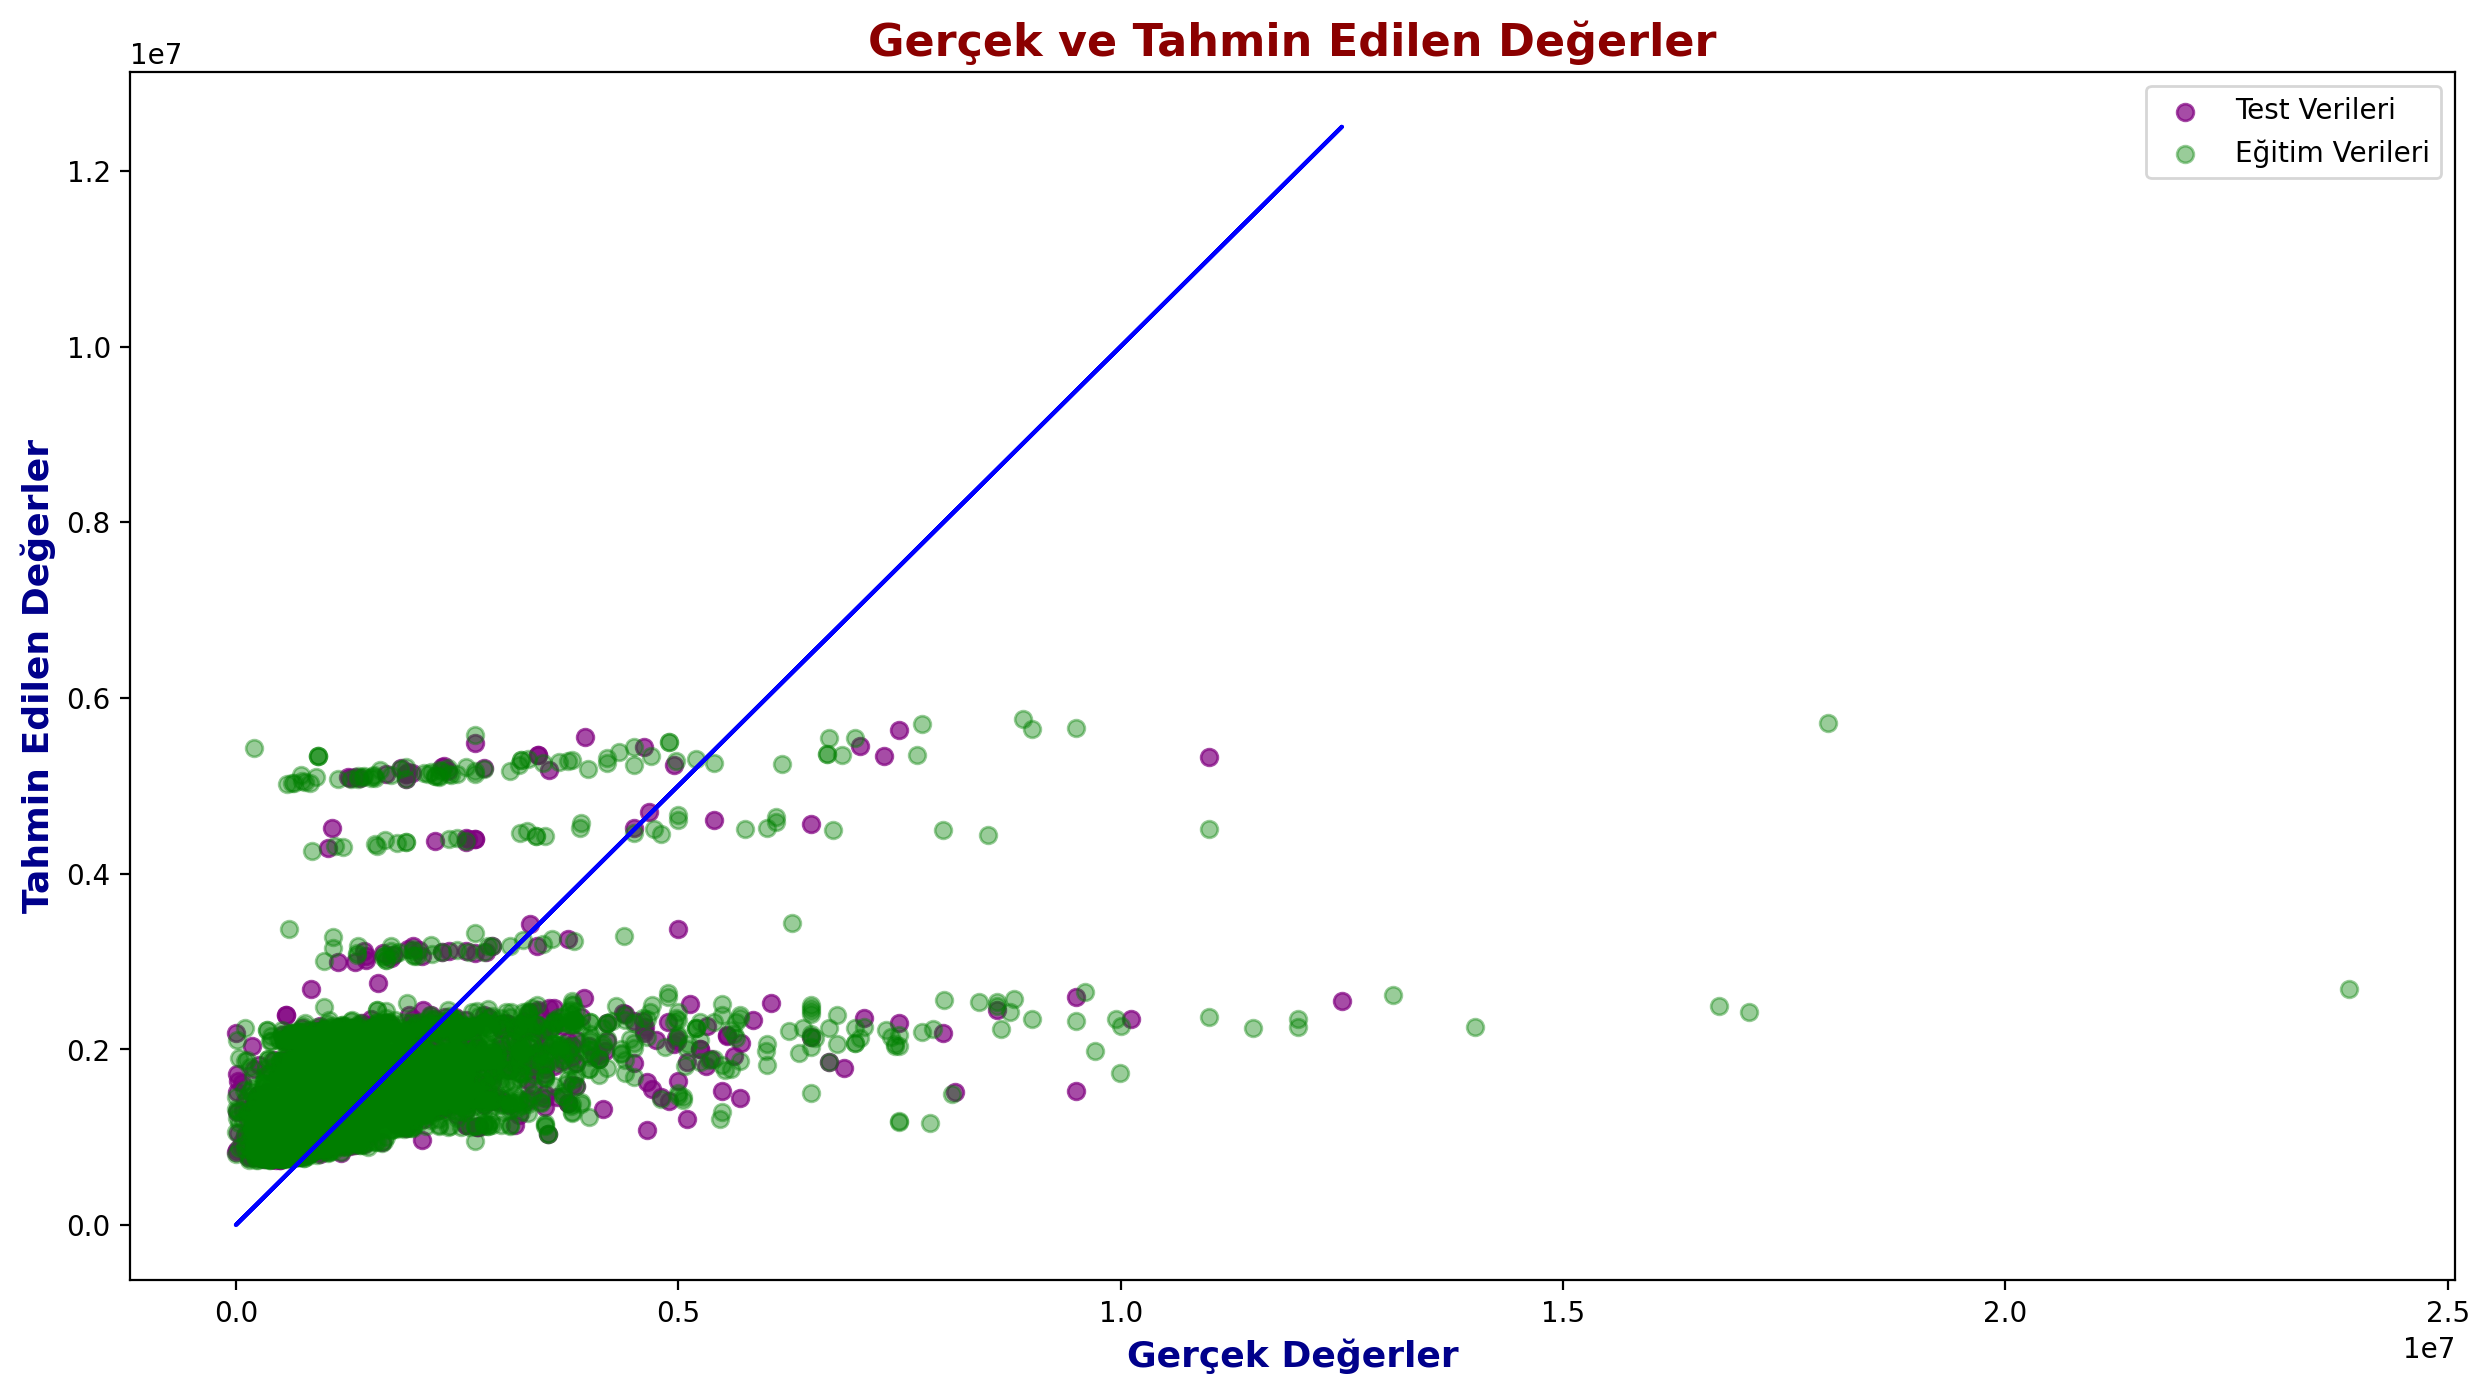

In [12]:
tahmin_test = model.predict(X_test)
tahmin_egitim = model.predict(X_train)

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 13 }

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8), dpi=200)
ax1 = plt.scatter(y_test,tahmin_test,alpha=0.7,color="purple", )
ax2 = plt.scatter(y_train,tahmin_egitim,alpha=0.4,color="green")
ax3 = plt.plot(y_test,y_test,color="blue")
plt.xlabel("Gerçek Değerler",color = "darkblue", fontsize=13, fontweight='bold')
plt.ylabel("Tahmin Edilen Değerler",color = "darkblue", fontsize=13, fontweight='bold' )
plt.title("Gerçek ve Tahmin Edilen Değerler", color = "darkred", 
          fontsize=16, fontweight='bold' )
plt.legend([ax1,ax2], ["Test Verileri", 'Eğitim Verileri'])
plt.show()

In [16] girdisinde neden x'leri predict ettiğimizi anlayamadım

# Classification

In [13]:
df = pd.read_csv(r"C:\Users\admin\Desktop\bootcamp\proje3\creditcard - Copy.csv")
print(df.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [14]:
X = df.drop('Class', axis=1)
y = df['Class'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=113)

print("Eğitim kümesi boyutu (X) :", X_train.shape)
print("Eğitim kümesi boyutu (y) :", y_train.shape)
print("Test kümesi boyutu (X)   :", X_test.shape)
print("Test kümesi boyutu (y)   :", y_test.shape)

Eğitim kümesi boyutu (X) : (12616, 30)
Eğitim kümesi boyutu (y) : (12616, 1)
Test kümesi boyutu (X)   : (3154, 30)
Test kümesi boyutu (y)   : (3154, 1)


In [15]:
girdi_adedi = X_train.shape[1]

siniflandirma_modeli = Sequential()
siniflandirma_modeli.add(Dense(16, 
                               activation='relu', 
                               input_shape = (girdi_adedi,), 
                               name = "Gizli_Katman_1"))

siniflandirma_modeli.add(Dense(4, 
                               activation='relu', 
                               name = "Gizli_Katman_2"))

siniflandirma_modeli.add(Dense(1, activation='sigmoid', name = "Cikti"))

siniflandirma_modeli.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Gizli_Katman_1 (Dense)       (None, 16)                496       
_________________________________________________________________
Gizli_Katman_2 (Dense)       (None, 4)                 68        
_________________________________________________________________
Cikti (Dense)                (None, 1)                 5         
Total params: 569
Trainable params: 569
Non-trainable params: 0
_________________________________________________________________


In [16]:
siniflandirma_modeli.compile(optimizer ='adam',
                             loss='binary_crossentropy', 
                             metrics =['accuracy'])

siniflandirma_modeli.fit(X_train, y_train, epochs=100, verbose=0)

Çok veri olunca complie kısmı çalışmadı ve baya bekledi ben de datasetin rowlarını küçülttüm. 

In [17]:
dogruluk_egitim = siniflandirma_modeli.evaluate(X_train, y_train)[1]
dogruluk_test = siniflandirma_modeli.evaluate(X_test, y_test)[1]

print("\nEğitim kümesi doğruluk değeri : {:.3f}".format(dogruluk_egitim))
print("Test kümesi doğruluk değeri   : {:.3f}".format(dogruluk_test))

99/99 [==============================] - 0s 504us/step - loss: 0.0656 - accuracy: 0.9971

Eğitim kümesi doğruluk değeri : 0.997
Test kümesi doğruluk değeri   : 0.997


In [18]:
y_tahmin=siniflandirma_modeli.predict(X_test)
y_tahmin =(y_tahmin>0.5)

from sklearn.metrics import confusion_matrix
hm = confusion_matrix(y_test, y_tahmin)
print(hm)

[[3137    3]
 [   6    8]]
